# Interpolation ☕️☕️

## I. Introduction 

Ce TP est une ouverture et n'est pas du *machine learning* à proprement parler. Nous allons cependant mettre en avant un ensemble de phénomènes très pertinents en *machine learning*. Soit un espace de départ, noté $\mathcal{X}\subseteq\mathbb{R}^d$, $d>0$ et un espace d'arrivée $\mathcal{Y}\subseteq\mathbb{R}$. Supposons qu'il existe une fonction $f^\star:\mathcal{X}\rightarrow\mathcal{Y}$ inconnue mais qu'il soit possible de collecter un jeu de données de la forme $S_n=\{(x_i, y_i=f^\star(x_i))\}_{i\leq n}$. L'objectif de l'interpolation va être de trouver une fonction $\hat{f}:\mathcal{X}\rightarrow\mathcal{Y}$ telle que $\forall x_i, y_i\in S_n$, nous ayons $\hat{f}(x_i)=y_i=f^\star(x_i)$. De plus, on espère qu'en faisant cela, la fonction $\hat{f}$ ne soit pas très loin de la fonction $f^\star$ sur les parties de son domaine entre les points de notre jeu de données.

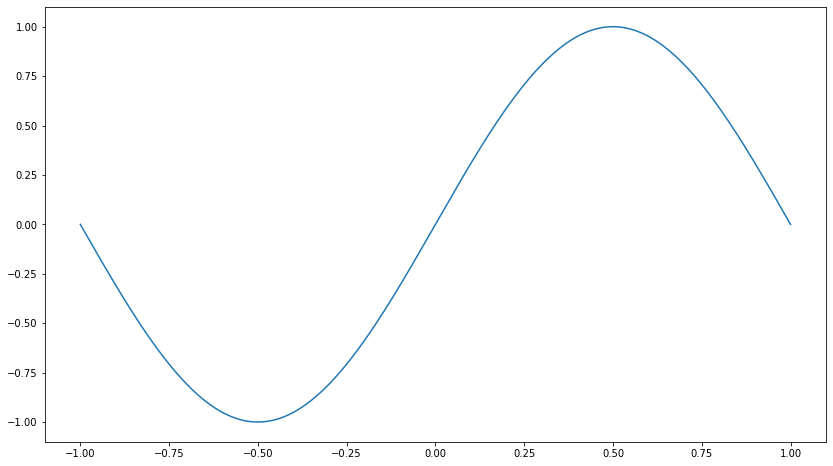

In [49]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 5001)
y = np.sin(np.pi*x)

plt.figure(figsize=(14, 8))
plt.plot(x, y)
plt.show()

Construisons notre jeu de données en échantilonnant quelques points dans $\mathcal{X}$.

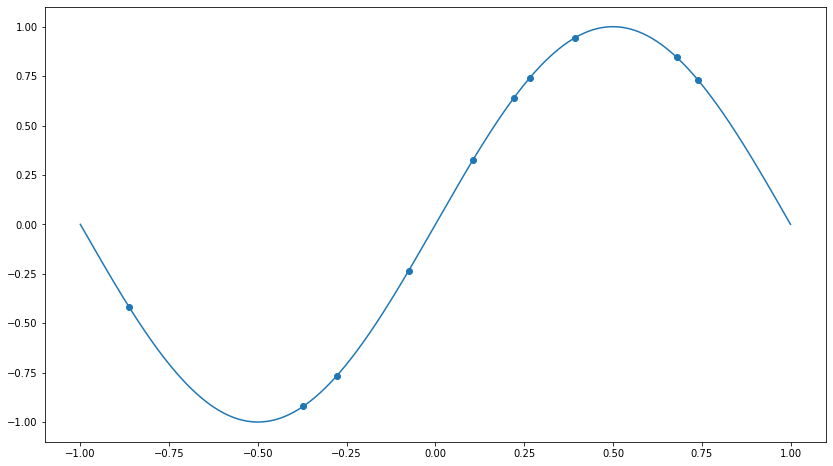

In [68]:
n = 10
X = np.random.uniform(-1, 1, n)
S = np.stack([X, np.sin(np.pi*X)], axis=1)

plt.figure(figsize=(14, 8))
plt.plot(x, y)
plt.scatter(S[:, 0], S[:, 1])
plt.show()

La courbe bleue est la courbe qu'on recherche. Les points bleus sont les seules informations visibles auxquelles nous avons accès. L'objectif est de s'appuyer sur ces informations pour construire les meilleures fonctions possibles. Cela peut se faire de beaucoup de manières différentes et nous allons en étudier quelques unes.

## II. Quelques exemples simples d'interpolations

### A. Interpolation constante par morceau (interpolateur d'ordre $0$)

L'idée est de considérer que la valeur de notre fonction est celle du point le plus proche : c'est le 1NN !

**<span style='color:blue'> Exercice
</span>** Proposez un code qui retourne pour chaque valeur du vecteur x, le label associé au point le plus proche de notre jeu de données $S$.
----

In [45]:
def f_piece_wise_constant(x):
    if type(x) is not np.ndarray:
        x = np.array([x])
    y = np.zeros_like(x)
    print(y.shape)
    ####### Complete this part ######## or die ####################    
    if type(x) is not np.ndarray:
        x = np.array([x])
    y = np.zeros_like(x)
    ####### Complete this part ######## or die ####################
    for i, v in enumerate(x):
        dist = np.abs(S[:, 0] - v)
        idx = np.argmin(dist)
        y[i] = S[idx, 1]
    return y
    ###############################################################


(5001,)


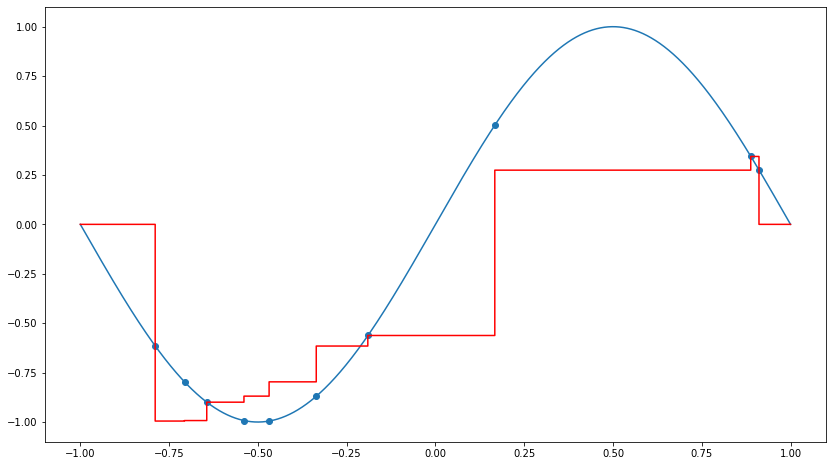

In [46]:
plt.figure(figsize=(14, 8))
plt.plot(x, y)
plt.scatter(S[:, 0], S[:, 1])
plt.step(x, f_piece_wise_constant(x), color='red')
plt.show()


Étudions visuellement la convergence de cette méthode.

(5001,)
(5001,)
(5001,)


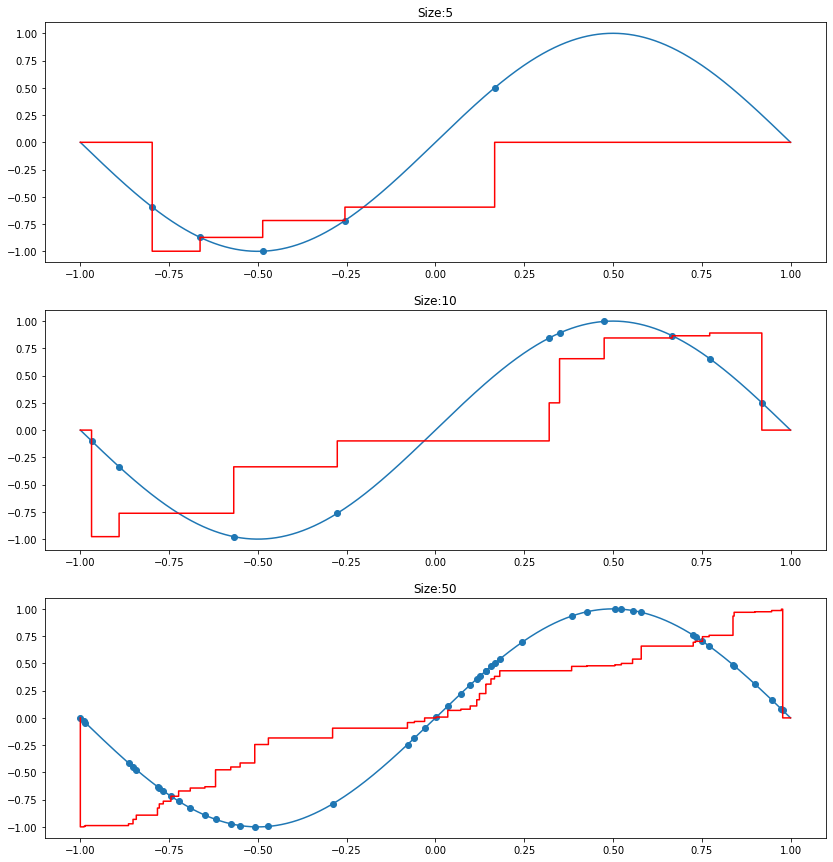

In [47]:
plt.figure(figsize=(14, 15))
for i, n in enumerate([5, 10, 50]):
    X = np.random.uniform(-1, 1, n)
    S = np.stack([X, np.sin(np.pi*X)], axis=1)
    plt.subplot(3, 1, i+1)
    plt.plot(x, y)
    plt.scatter(S[:, 0], S[:, 1])
    plt.step(x, f_piece_wise_constant(x), color='red')
    plt.title('Size:' + str(n))
plt.show()


On voit que les endroits où l'interpolation nous gêne correspondent aux angles de nos palliers. Nous pouvons faire mieux via une interpolation linéaire.

### B. Interpolation linéaire (interpolateur d'ordre $1$)

Au lieu de n'exploiter que l'information du point le plus proche, l'idée est d'ici d'interpoler linéairement entre les deux points qui encadrent notre valeur. Notons $(x_l, y_l)\in S_n$ le point qui encadre par la gauche notre nouveau $x$ et $(x_r, y_r)\in S_n$ celui de droite. Une interpolation linéaire se calcule tout simplement de la manière suivante :

$$q(x)=y_r+(y_l-y_r)\frac{x-x_r}{x_l-x_r},\ x\in[x_l, x_r].$$

**<span style='color:blue'> Exercice
</span>** **Proposez un code qui retourne pour chaque valeur du vecteur x, son interpolation linéaire s'il est bien encadré et $\texttt{None}$ sinon.**
----

In [60]:
def f_linear(x):
    if type(x) is not np.ndarray:
        x = np.array([x])
    y = np.zeros_like(x)
    ####### Complete this part ######## or die ####################
    ####### Complete this part ######## or die ####################
    for i, v in enumerate(x):
        
        dist = S[:, 0] - v
        left = np.copy(dist)
        left[left >= 0] = float('inf')
        left = np.abs(left)
        right = np.copy(dist)
        right[right < 0] =float('inf')
        right = np.abs(right)
        
        idx_left = np.argmin(left)
        idx_right = np.argmin(right)
        # les deux premiers if sont la pour gere les cas extremes a droite
        # et a gauche
        if not np.isfinite(left[idx_left]):
            y[i] = None
        elif not np.isfinite(right[idx_right]):
            y[i] = None
        else:
            y[i] = S[idx_right, 1]+(S[idx_left, 1]-S[idx_right, 1])*\
            (v-S[idx_right, 0])/(S[idx_left, 0]-S[idx_right, 0])
    return y
    ###############################################################


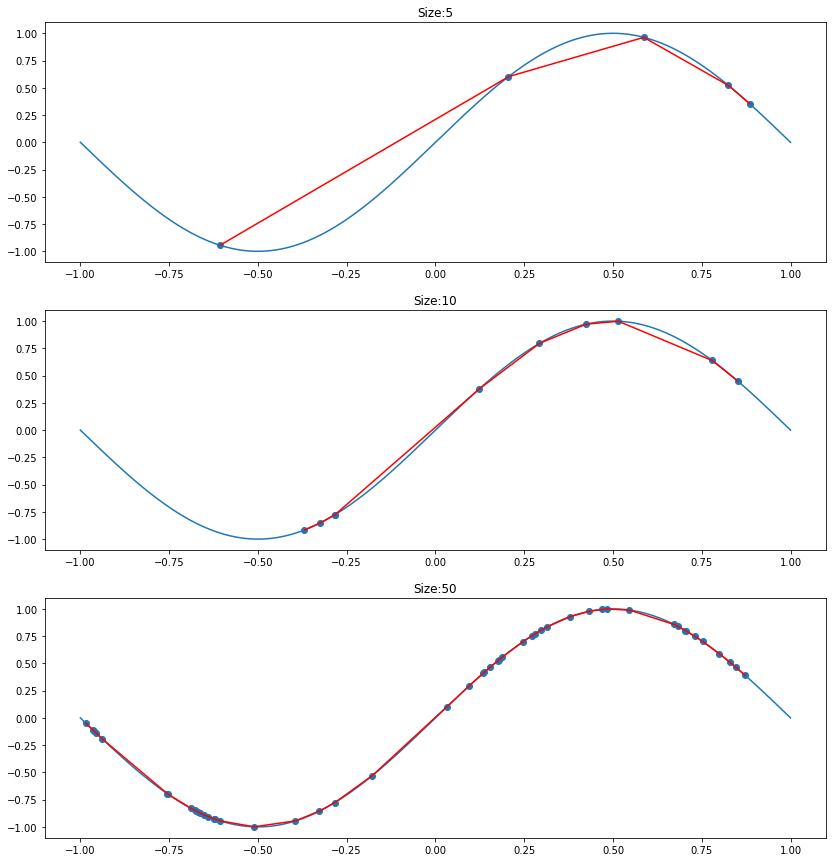

In [61]:
plt.figure(figsize=(14, 15))
for i, n in enumerate([5, 10, 50]):
    X = np.random.uniform(-1, 1, n)
    S = np.stack([X, np.sin(np.pi*X)], axis=1)
    plt.subplot(3, 1, i+1)
    plt.plot(x, y)
    plt.scatter(S[:, 0], S[:, 1])
    plt.plot(x, f_linear(x), color='red')
    plt.title('Size:' + str(n))
plt.show()


## III. Interpolation polynomiale

L'interpolation linéaire donne de bon résultats sauf qu'en pratique les fonctions qu'on cherche à estimer sont plus "lisses". L'idée va être de contourner cela par une interpolation polynomiale.  

### A. Polynome interpolateur de Lagrange

On souhaite construire un polynome interpolateur d'une fonction dont nous possédons des points de mesure $\mathcal{S} = \{(x_1, y_1), \dots (x_n, y_n)\}$ et où on suppose les $x_i$ deux à deux distincts. Pour cela, nous allons construire une solution de ce type&nbsp;:

$$L(x) = \sum_{j=1}^{N}y_jL_j(x)$$
             
C'est-à-dire une combinaison de polynomes $L_j$ dont on souhaitera qu'ils aient la propriété suivante&nbsp;:

$$L_j(x) = \begin{cases} 
      1 & x = x_j \\
      0 & x \neq x_j, \exists l\leq n, x=x_l
\end{cases}$$


Chaque polynome s'annule exactement en tous les points d'interpolation sauf un. La somme passe donc exactement par tous les points. On aura donc $L(x_i)=y_i$ $\forall (x_i, y_i) \in \mathcal{S}$.

**Première tentative naive&nbsp;:**

On peut définir les $L_j$, polynômes intermédiaires dont l'expression est donnée par&nbsp;:
\begin{equation*}
    L_j(x) = \prod\limits_{\substack{k=1 \\ k\neq j}}^N x - x_k
\end{equation*}
on aurait donc $\forall i \neq j, L_j(x_i) = 0$. Nous avons bien $0$ lorsque $i\neq j$, mais nous échouons à obtenir $1$ lors que $i=j$&nbsp;:
\begin{equation*}
    L_j(x_j) = \prod\limits_{\substack{k=1 \\ k\neq j}}^N x_j  - x_k \neq 1
\end{equation*}
Nous pouvons résoudre cela en normalisant notre première tentative par ce terme pour qu'on obtienne bien ce qu'on veut&nbsp;:
\begin{equation*}
    L_j(x) =  \frac{\prod\limits_{\substack{k=1 \\ k\neq j}}^Nx - x_k}{\prod\limits_{\substack{k=1 \\ k\neq j}}^Nx_j - x_k} = \prod\limits_{\substack{k=1 \\ k\neq j}}^N\frac{x - x_k}{x_j - x_k}
\end{equation*}

Nous obtenons donc&nbsp;:
\begin{equation*}
    L(x) = \sum_{j=1}^{N}y_j\prod\limits_{\substack{k=1 \\ k\neq j}}^N  \frac{x - x_k}{x_j - x_k}
\end{equation*}

**<span style='color:blue'> Exercice
</span>** **Montrez que le polynôme résultant est bien de degré $N-1$.**
----


**<span style='color:blue'> Exercice complémentaire
</span>** 
**Démontrez que le polynôme est bien un polynôme interpolateur et passe bien par l'ensemble des points de notre jeu de données.**

----


**<span style='color:blue'> Exercice
</span>** **Proposez un code qui réalise l'interpolation de Lagrange et retourne pour chacune des valeurs de $x$ son interpolation.**
----

In [64]:
def f_polynomial(x):
    ####### Complete this part ######## or die ####################
    r = 0
    for i in range(S.shape[0]):
        m = S[i, 1]
        for j in range(S.shape[0]):
            if i != j:
                m *= (x-S[j, 0]) / (S[i, 0]-S[j, 0])
        r += m
    return r
    ###############################################################


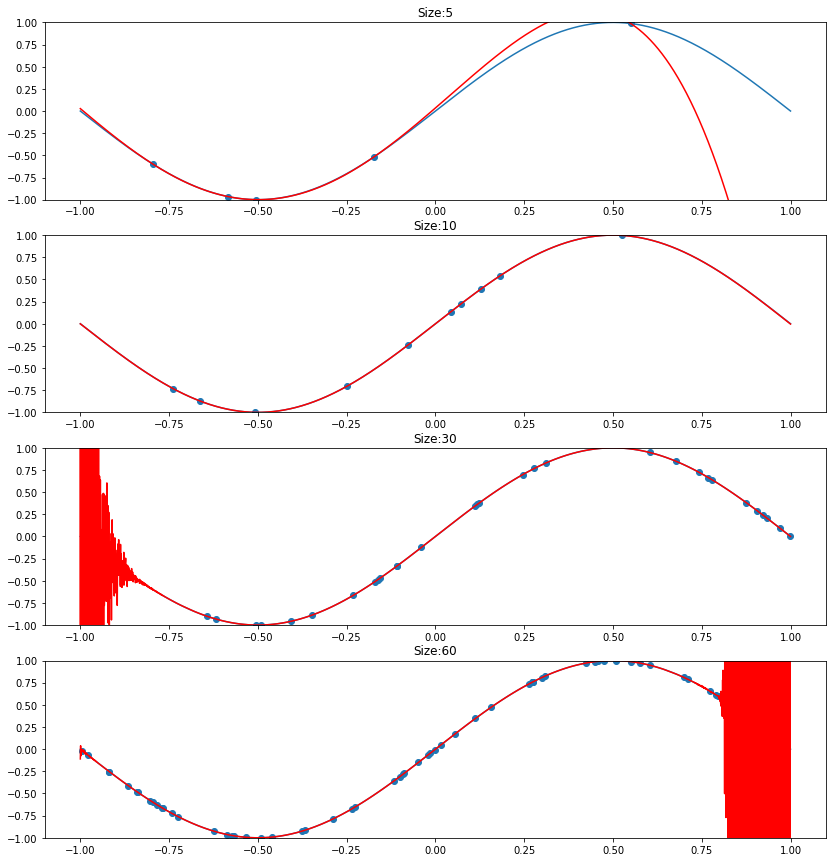

In [80]:
plt.figure(figsize=(14, 15))
for i, n in enumerate([5, 10, 30, 60]):
    X = np.random.uniform(-1, 1, n)
    S = np.stack([X, np.sin(np.pi*X)], axis=1)
    plt.subplot(4, 1, i+1)
    plt.plot(x, y)
    plt.scatter(S[:, 0], S[:, 1])
    plt.plot(x, f_polynomial(x), color='red')
    plt.ylim(-1, 1)
    plt.title('Size:' + str(n))
plt.show()


On remarque que notre polynôme en s'écartant des points de notre jeu de données et notamment sur les bords, devient très instable. Et cela est d'autant plus vrai que nous avons augmenté le nombre de points (ce qui peut sembler contre-intuitif).

### B. Interpolation polynomiale par régression (non) linéaire

Nous allons voir dans cette section qu'il est aussi possible de produire des fonctions interpolatrices à partir du formalisme des moindres carrés que nous avons vu précédemment. En effet, comme nous l'avons vu dans le TP sur la regression linéaire, il est possible de représenter n'importe quel polynôme de la façon suivante&nbsp;:


$$L(x)  = \beta_0 + \sum_{i=1}^p \beta_i x^i = \langle \boldsymbol{\beta},  \phi_p(x) \rangle$$

avec&nbsp;:


$$\begin{aligned}\phi_p(x) =  \begin{bmatrix}
           1 \\
           x\\
           \vdots\\
           x^p
         \end{bmatrix}\end{aligned}$$


Après avoir procédé à ce changement de variable sur les tous les échantillons, nous pouvons définir la nouvelle matrice des données comme&nbsp;:

$$\begin{aligned}\boldsymbol{\Phi}_p(\boldsymbol{X}) = 
\begin{pmatrix} 
1 & x_{1} & x_{1}^2 & \dots & x_1^p \\
. & . & \dots & .\\
1 & x_{j}  & x_{j}^2 & \dots & x_j^p\\
. & . & \dots & .\\
1 & x_{N}  & x_{N}^2 & \dots & x_N^p
\end{pmatrix}\end{aligned}$$

Et notre polynôme se construit de la manière suivante&nbsp;:

$$\begin{aligned}\boldsymbol{L(X)} = \Big[\boldsymbol{\Phi}_p(\boldsymbol{X}) \Big]
\boldsymbol{\beta}  = 
\begin{pmatrix} 
\beta_0 + \beta_1 x_{1} + \beta_2 x_{1}^2 + \dots + \beta_p x_1^p \\
\dots \\
\beta_0 + \beta_1 x_{j} + \beta_2 x_{j}^2 + \dots + \beta_p x_j^p\\
\dots\\
\beta_0 + \beta_1 x_{N}  + \beta_2 x_{N}^2 + \dots + \beta_p x_N^p
\end{pmatrix},\ \boldsymbol{\beta}\in\mathbb{R}^{p+1}\text{ et }\boldsymbol{L(X)}\in\mathbb{R}^N.
\end{aligned}$$

Nous avons donc donc un système linéaire de $p+1$ équations et $N$ inconnues. Il est ainsi possible d'approximer une fonction non linéaire qui minimise les erreurs au carré entre les valeurs du polynôme évalués avec les vraies valeurs de notre jeu de données. Nous avons transformé noter problème de regression linéaire en un probleme de regression polynômiale (non linéaire). 

**<span style='color:blue'> Question 1
</span>** **Rappellez l'expression de la solution des equations normales des moindres carrés et adaptez-la à ce changement de variable pour trouver les coefficients du polynôme qui minimise les moindres carrés.**
----


**<span style='color:blue'> Question 2
</span>** **Pour quelle(s) valeur(s) de $p$ (ordre du polynôme) nous avons une solution interpolatrice de manière garantie ? Rappellez l'origine des difficultés sur la stabilité de la solution obtenues par la méthodes des EQN ?**
----

**<span style='color:orange'> Remarque
</span>** 
Il est intéressant de montrer que la solution des EQN obtenue à partir de la matrice  $\boldsymbol{\Phi_{N-1}(X)}$ (matrice carré $N=p+1$ aussi appellée la matrice de *Vandermonde*) correspond en fait exactement aux coefficients du polynôme interpolateur de Lagrange qui en est l'unique solution (si $x_j\neq x_i\forall j\neq i$)&nbsp;! 
----

**<span style='color:blue'> Exercice 
</span>** **Proposez un code qui réalise l'interpolation de Lagrange par la méthode des EQN des moindres carrés et qui retourne pour chacune des valeurs de $x$ son interpolation. (On pourra reprendre le code du TP sur la regresion linéaire).**
----

In [87]:
class Polynomial(object):
    def __init__(self, deg):
        self.deg = deg


    def _transform(self, X):
        # here we transform the input into a polynomial
        t = []
        X = X.reshape((X.shape[0], 1)) if len(X.shape) == 1 else X
        for i in range(0, self.deg+1):
            t.append(X**i)
        return np.concatenate(t, axis=1)
    
    def fit(self, X, y):
        ####### Complete this part ######## or die ####################
        X_transformed = self._transform(X)
        D = np.dot(X_transformed.T, X_transformed)
        self.beta = np.dot(np.dot(np.linalg.pinv(D), X_transformed.T), y)
        ###############################################################
        
    def predict(self, X):
        if self.beta is None:
            print('You must fit the model first')
        else:
            X_transformed = self._transform(X)
            return np.dot(X_transformed, self.beta)
    def score(self, X, y):
        prediction = self.predict(X)
        errors = (prediction - y) **2
        return errors.sum()/errors.shape[0]


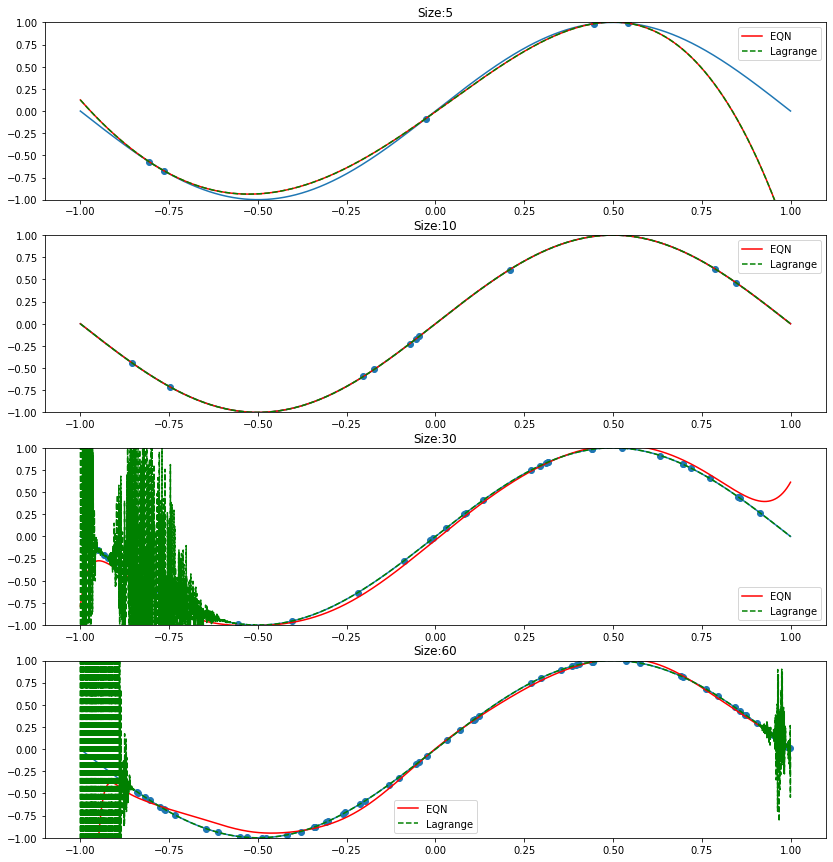

In [86]:
import matplotlib

plt.figure(figsize=(14, 15))
for i, n in enumerate([5, 10, 30, 60]):
    X = np.random.uniform(-1, 1, n)
    S = np.stack([X, np.sin(np.pi*X)], axis=1)
    model = Polynomial(n-1)
    model.fit(S[:, 0], S[:, 1])
    plt.subplot(4, 1, i+1)
    plt.plot(x, y)
    plt.scatter(S[:, 0], S[:, 1])
    plt.plot(x, model.predict(x), color='red', label='EQN')
    plt.plot(x, f_polynomial(x), "--", color='green', label='Lagrange')
    plt.ylim(-1, 1)
    plt.title('Size:' + str(n))
    plt.legend()
plt.show()


**<span style='color:blue'> Exercice
</span>** Dans votre réponse pour l'exercice précédent, jouez avec $\texttt{pinv}$ et $\texttt{inv}$. Comprenez-vous pourquoi la solution n'est pas identique ?
----

## IV. Splines

Comme nous l'avons vu, il existe parfois certains effets pathologiques de l'interpolation polynomiale où la fonction peut avoir des variations arbitrairement hautes entre les points de contrôle. On aimerait d'une certaine manière éviter ces comportements de sorte à ce que la fonction prenne des valeurs raisonnables entre les points. Nous allons voir ici une autre façon de construire une solution interpolatrice de notre jeu de donnée.

L'interpolation par *spline* consiste à trouver des approximations locales de notre fonction. Plus formellement, il s'agit de trouver pour chaque intervalle $[x_i, x_{i+1}]$ un polynôme $P_i(x)$ qui satisfait certaines propriétés. On aura ainsi une interpolation $S(x)$ de la fonction qui nous intéresse par&nbsp;:


$$\begin{aligned}S(x) =  
\begin{cases} 
P_1(x) & x_1\leq x \leq x_2 \\
P_2(x) & x_2\leq x \leq x_3 \\
\dots \\
P_{N-1}(x) & x_{N-1}\leq x \leq x_N \\
\end{cases}\end{aligned}$$

où chaque polynôme intermédiaire $P_i$ d'ordre $p$ peut s'écrire de la manière suivante&nbsp;:

$$P_i(x) = a_i^{(0)} + a_i^{(1)}(x - x_i) + \frac{a_i^{(2)}}{2}(x - x_i)^2 + \ldots + \frac{a_i^{(p)}}{p!}(x - x_i)^p$$

et où l'on note $(k)$ comme un indice et non comme une puissance. Il s'agira donc de determiner $p+1$ coeficients pour chacun des $N-1$ intervalles séparant les points de controles successifs. 

**<span style='color:orange'> Remarque
</span>** On remarque que les cas ou $p=0$ et $p=1$ correspondent respectivement à l'interpolateur constant par morceaux (ordre $0$) comme nous avons pu les voir dans les parties précédentes. Les *splines* sont donc une généralisation des premières approches triviales vues dans la première partie de ce TP. Lorsque $p=1$, certaines propriétés souhaitables ne sont plus garanties. On voudrait ainsi que la fonction soit au moins $\mathcal{C}^2$ partout y compris au niveau des points de contrôles où on constate pour l'ordre 1 par exemple que la fonction n'est pas lisse.
----

### A. Les splines cubiques

Nous allons donc travailler avec un ordre $p=3$ (les *splines* cubiques), et les polynômes $P_i$ sont de la forme&nbsp;:

\begin{equation}
P_i(x) = a_i^{(0)} + a_i^{(1)}(x - x_i) + \frac{a_i^{(2)}}{2}(x - x_i)^2 + \frac{a_i^{(3)}}{6}(x - x_i)^3,
\end{equation}

et tenter de construire une fonction interpolatrice $S$ qui est $C^2$, c'est-à-dire continue avec les dérivées et dérivées doubles continues. Pour cela posons un certain nombre de contraintes&nbsp;:

- $P_i(x_{i+1}) = P_{i+1}(x_{i+1}) = y_{i+1}$ : la fonction doit être continue au niveau des points de contrôle,

- $P_i^{'}(x_{i+1}) = P_{i+1}^{'}(x_{i+1})$ : la fonction dérivée doit être continue au niveau des points de contrôle,

- $P_i^{''}(x_{i+1}) = P_{i+1}^{''}(x_{i+1})$ : et les dérivées secondes doivent être continues au niveau des points de contrôle.

Pour $N$ points, nous avons $N-1$ intervalles et donc $N-1$ polynômes à trouver. Chaque polynôme $P_i$ possède quatre coefficients $a_i^{(0)}, a_i^{(1)}, a_i^{(2)}$ et $a_i^{(3)}$ à trouver. Cela nous donne $4(N-1)$ coefficients à trouver pour estimer S.

**<span style='color:blue'> Question
</span>** **Existe-t-il un ensemble unique de coeficients satisfaisant ces contraintes ? Si non, que rajouter comme contraintes afin de garantir l'unicité de la solution ?**
----


### B. Estimation des coefficients

**<span style='color:blue'> Question 1
</span>** **Montrez à partir de la contrainte 1 par identification qu'on peut trouver très facilement que $a_i^{(0)} = y_i$**
----

Nous allons exprimer les $a_i^{(1)}, a_i^{(2)}$ et $a_i^{(3)}$ en fonction des dérivée et dérivée doubles de nos polynômes $P_i^\prime$ et $P_i^{\prime\prime}$&nbsp;:

$$P_i^{'}(x) = a_i^{(1)} + a_i^{(2)}(x - x_i) + \frac{a_i^{(3)}}{2}(x - x_i)^2$$

$$P_i^{''}(x) = a_i^{(2)}+ a_i^{(3)}(x - x_i)$$

**<span style='color:blue'> Question 2
</span>** **Montrez à partir de la contrainte 4 qu'on obtient $ a_i^{(3)} = \frac{a_{i+1}^{(2)} -  a_i^{(2)}}{\Delta x_i}$ en notant $\Delta x_i = x_{i+1}-x_i, \forall i$**
----

**<span style='color:blue'> Question 3
</span>** **Montrez à partir de $P_i(x_{i+1})=y_{i+1}$ que $a_i^{(1)} = \frac{\Delta y_i}{\Delta x_i} - \frac{a_i^{(2)}}{3}\Delta x_i  -\frac{a_{i+1}^{(2)}}{6} \Delta x_i$ en notant $\Delta y_i = y_{i+1} - y_i$**
----

**<span style='color:blue'> Question 4
</span>** **Finalement, montrez à partir de la contrainte 3 et en injectant les expression de $a_i^{(1)}$, $a_{i+1}^{(1)}$ et $a_i^{(3)}$ à partir de la formule précédente que nous obtenons bien&nbsp;:**

$$\Delta x_i a_i^{(2)} + 2\big[ \Delta x_i + \Delta x_{i+1}\big]a_{i+1}^{(2)} + \Delta x_{i+1}a_{i+2}^{(2)} = 6 \big[F_{i+1} -  F_i\big],$$

où $F_i=\frac{\Delta y_i}{\Delta x_i}=\frac{y_{i+1}-y_i}{\Delta x_i}$.
----

On a donc un système de $N-2$ équations et $N-2$ inconnues (les $a_i^{(2)}$ sans $a_1^{(2)}$ et $a_{N}^{(2)}$ qu'on à fixé à 0). 

**<span style='color:orange'> Remarque
</span>** On peut écrire l'équation précédente sous une forme matricielle&nbsp;:

$$\begin{pmatrix} 
2[\Delta x_1 + \Delta x_2] & \Delta x_2 & \dots & 0\\
\Delta x_2 & 2[\Delta x_2 + \Delta x_3] & \Delta x_3 & \dots\\
\vdots &   \vdots  &  \vdots  & \vdots \\
0 & 0 & \dots & 0\\
0 & \dots & \Delta x_{N-2}  & 2[\Delta x_{N-2}+\Delta x_{N-1}]\\
\end{pmatrix} \begin{pmatrix} 
a_2^{(2)} \\
.\\
a_i^{(2)}\\
.\\
a_{N-1}^{(2)}
\end{pmatrix}  = \begin{pmatrix} 
\Delta F_1 \\
.\\
\Delta F_i\\
.\\
\Delta F_{N-1}
\end{pmatrix}$$

en notant $\Delta F_i = 6 \big[F_{i+1} -  F_i\big]$. On remarque que cette matrice est creuse, l'inversion d'une telle matrice sera donc efficace numériquement:


$$\Big[D\Big]\boldsymbol{a}^{(2)}  = \boldsymbol{\Delta F} \Leftrightarrow  \boldsymbol{a}^{(2)}  = \Big[D\Big]^{-1}\boldsymbol{\Delta F}$$
----
La suite consiste à trouver les autres coefficients qu'on a déjà exprimés en fonction de ceux que l'on vient de trouver. Il ne nous reste plus qu'à appliquer les relations décrites par les équations&nbsp;:
- $a_i^{(0)} = y_i$ $\forall i$, 
- $\boldsymbol{a}^{(2)}  = \Big[D\Big]^{-1}\boldsymbol{\Delta F}$
- $a_i^{(1)} = F_i - \frac{1}{3}\Big[a_i^{(2)}  + \frac{a_{i+1}^{(2)}}{2}\Big] \Delta x_i$ $\forall i$,
- $a_i^{(3)} = \frac{a_{i+1}^{(2)} -  a_i^{(2)}}{\Delta x_i}$ $\forall i$.

Et le tour est joué, nous avons determiné totalement les paramètres de notre spline $S$.

**<span style='color:blue'> Exercice
</span>** **Proposez un code qui réalise le calcul d'une spline cubique**
-------

In [ ]:
class CubicSpline(object):
        def __init__(self, X, y): 
            idx = np.argsort(X)
            self.X = X[idx] 
            self.y = y[idx]
            
            self.N = X.shape[0]
            self.coefs = np.zeros((self.N - 1,4))
            
            # Fit Intermediate variables
            #  Complete Code  here ######## or die ##
            dx = ...
            F  = ...
            dF = ...
            D  = np.zeros((self.N-1,self.N-1))
            for i in range(self.N-1):
                ...
            #########################################
            
            # Fit Spline coefficients
            #  Complete Code  here ######## or die ##
            self.coefs[:,0] = ...
            self.coefs[:,2] = ...
            self.coefs[:,1] = ...
            self.coefs[:,3] = ...
            #########################################
            
        def __call__(self, x):
            if type(x) is not np.ndarray:
                x = np.array([x])
            y = np.zeros_like(x)
            for j, v in enumerate(x):
                dist = self.X - v
                left = np.copy(dist)
                left[left >= 0] = float('inf')
                left = np.abs(left)
                right = np.copy(dist)
                right[right < 0] =float('inf')
                right = np.abs(right)

                i = np.argmin(left)
                i_ = np.argmin(right)

                if not np.isfinite(left[i]):
                    i = 0
                elif not np.isfinite(right[i_]):
                    i =  self.N - 1
                #  Complete Code  here ######## or die ##
                ...
                #########################################
            return y
        


In [ ]:
plt.figure(figsize=(14, 15))
for i, n in enumerate([5, 10, 50]):
    X = np.random.uniform(-1, 1, n)
    S = np.stack([X, np.sin(np.pi*X)], axis=1)
    idx = np.argsort(S[:, 0])
    spline = CubicSpline(S[idx, 0], S[idx, 1])
    plt.subplot(3, 1, i+1)
    plt.plot(x, y)
    plt.scatter(S[:, 0], S[:, 1])
    plt.plot(x, spline(x), color='red')
    plt.ylim(-1, 1)
    plt.title('Size:' + str(n))
plt.show()


Nous pouvons aussi utiliser l'outil $\texttt{CubicSpline}$ de $\texttt{scipy}$.

In [ ]:
from scipy.interpolate import CubicSpline

plt.figure(figsize=(14, 15))
for i, n in enumerate([5, 10, 50]):
    X = np.random.uniform(-1, 1, n)
    S = np.stack([X, np.sin(np.pi*X)], axis=1)
    idx = np.argsort(S[:, 0])
    spline = CubicSpline(S[idx, 0], S[idx, 1])
    plt.subplot(3, 1, i+1)
    plt.plot(x, y)
    plt.scatter(S[:, 0], S[:, 1])
    plt.plot(x, spline(x), color='red')
    plt.ylim(-1, 1)
    plt.title('Size:' + str(n))
plt.show()

## V. De l'interpollation vers l'approximation

Nous allons voir ici une autre manière de contrôler un peu les fluctuations entre les points de contrôle qui va consister à trouver une fonction qui ne passe plus nécessairement exactement sur chaque point mais qui reste tout de même proche de la solution d'interpolation. Plus formellement, au lieu d'avoir $\forall x_i \in \mathcal{S}, \tilde{f}(x_i) = f^{\star}(x_i)$, nous aurons plutôt $\forall x_i \in \mathcal{S}, \tilde{f}(x_i) \approx f^{\star}(x_i)$. On parlera plutôt d'approximation de la fonction.

Comme nous l'avons vu, il est possible d'avoir des comportements non souhaitables via la solution des EQN quand la matrice $X^TX$ est mal conditionnée. Ce comportement apparaît notamment, si ses valeurs propres sont très petites voir nulles, on parle de matrice presque singulière dont l'inverse possède alors une norme forte. Le problème est alors *mal posé* car la solution devient très sensible aux fluctuations du bruit dans les données. 

Nous allons donc ici considérer une formulation dite régularisée de notre problème de régression polynomiale afin de mieux contrôler les fluctuations de ce dernier. Plus formellement, cela correspond à transformer notre problème *mal posé* $\mathcal{P}$ en une suite de problèmes *bien posés* $\mathcal{P}_\lambda, \lambda \in \mathbb{R}^{+}$, tel que $ \lim\limits_{\lambda \rightarrow 0}\hat{\beta}_{\lambda} = \hat{\beta}$. Avec $\hat{\beta}$ et $\hat{\beta}_{\lambda}$ les solutions respectives des problèmes $\mathcal{P}$ et $\mathcal{P}_\lambda$. La formulation régularisée d'un problème d’optimisation s'écrit de la façon suivante&nbsp;:

$$J^{\mathcal{D}}_{\lambda}(\beta) =  J_{\mathcal{D}}(\beta) + \lambda  \mathcal{\Omega}(\beta)$$

où&nbsp;:
1. $J_{\mathcal{D}}(\beta)$ correspond à l'expression de la fonction objectif du problème original,
2. $ \mathcal{\Omega}(\beta)$ correspond au terme de régularisation sur le vecteur des paramètres. Ce dernier terme correspond à une contrainte que l'on souhaiterait optimiser conjointement sur le vecteur des paramètres avec plus ou moins d'importance par rapport à la fonction objectif d'origine,
3. On réglera $\lambda$ en fonction de l'importance relative de la contrainte sur le vecteur des paramètres (et nous verrons pus tard que cela est équivalent à un problème d'optimisation sous contrainte ou \lambda joue le rôle du multiplicateur de Lagrange).

Pour limiter l'amplitude des fluctuations du polynôme entre les points nous pouvons donc construire une version régularisée de la fonction objectif des moindres carré suivante pour trouver une solution dont les coeficients sont les plus petits possibles&nbsp;:

\begin{equation}
     J_{\lambda}^{\mathcal{D}}(\beta) = ||\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\beta}||_2^2 + \lambda||\boldsymbol{\beta}||_2^2
\end{equation}
 
**<span style='color:orange'> Remarque
</span>**  Quand $\lambda \rightarrow 0$, $J_{\lambda}(\beta)^{\mathcal{D}} \rightarrow J(\beta)$. Quand $\lambda \rightarrow +\infty$, $J_{\lambda}(\beta)^{\mathcal{D}} \approx \lambda ||\boldsymbol{\beta}||_2^2 = \sum_{d=0}^p\beta_d^2$ et la solution optimal $\hat{\boldsymbol{\beta}}_{\lambda} \rightarrow \boldsymbol{0}$, *i.e.* la pénalité "domine" et la solution est indépendante des données.
----

---
Chercher à trouver le minimum de la fonction revient à trouver les $\beta$ tels que le gradient s'annule. 

**<span style='color:blue'> Question
</span>** **Calculer la nouvelle valeur de $\boldsymbol{\beta}$ qui annule le gradient de cette nouvelle fonction objectif.**
----

**<span style='color:blue'> Question
</span>** **Peut on trouver une solution interpolatrice avec cette version régularisée des moindres carré ?**
----



---
**<span style='color:blue'> Exercice
</span>** **Proposez une implémentation d'approximation du polynome interpolateur basé sur cette version régularisée des moindres carrés. On pourra reprendre le code déjà effectué dans le TP regression linéaire.**
------- 

In [ ]:
class Polynomial_reg(object):
    def __init__(self, deg):
        self.deg = deg

    def _transform(self, X):
        # here we transform the input into a polynomial
        t = []
        X = X.reshape((X.shape[0], 1)) if len(X.shape) == 1 else X
        for i in range(0, self.deg+1):
            t.append(X**i)
        return np.concatenate(t, axis=1)
    
    def fit(self, X, y):
        ####### Complete this part ######## or die ####################
        X_transformed = self._transform(X)
        ...
        ###############################################################
        
    def predict(self, X):
        if self.beta is None:
            print('You must fit the model first')
        else:
            X_transformed = self._transform(X)
            return np.dot(X_transformed, self.beta)
    def score(self, X, y):
        prediction = self.predict(X)
        errors = (prediction - y) **2
        return errors.sum()/errors.shape[0]


In [ ]:
n = 15
X = np.random.uniform(-1, 1, n)
Y = np.sin(np.pi*X)+np.random.normal(0, 0.005, size=(n,))
S = np.stack([X, Y], axis=1)
    
plt.figure(figsize=(14, 8))

d = n-1

plt.plot(x, y)
plt.scatter(S[:, 0], S[:, 1])

k = 6
colors = matplotlib.cm.jet(np.linspace(0, 1, k+1))#[2:2+3]
alphas = np.append([0.0], np.logspace(-6, -1, k))

for c, alpha in zip(colors, alphas):#[0, 1e-06, 1e-01]):
    model = Polynomial_reg(d, alpha)
    model.fit(X, Y)
    plt.plot(x, model.predict(x), c=c, label='regularity:' + str(alpha))

plt.ylim(-1, 1)
plt.legend()
plt.show()


**<span style='color:orange'> Remarques
</span>** 
- La solution $\hat{\boldsymbol{\beta}}_{\lambda}$ augmente en "compléxité" quand $\lambda \rightarrow 0$ et converge vers la solution interpolatrice $\hat{\boldsymbol{\beta}}$.

- En régularisant, on paye le prix de s'éloigner des valeurs ${(x_i, y_i})$ au profit d'être plus "raisonable" entre elles. Il est d'autant plus raisonable de ne pas passer exactement sur les données que les fluctuations de $y$ dues au bruit sont importantes.

- $\mathcal{P}_{\lambda}^{\mathcal{D}}$ pour $( \lambda, \mathcal{D})$ donnés est unique (même si le problème non régularisé ne l'est pas), on peut définir un *chemin de régularisation* unique en faisant varier $\lambda$, c'est à dire une unique séquence de solutions régularisées $\hat{\boldsymbol{\beta}}_{\lambda}$ convergeant vers la solution interpolatrice à mesure que $\lambda \rightarrow 0$. 

- Ainsi, on peut voir l'approximation d'une fonction comme un *arrêt prématuré* (*early stopping* en anglais) le long de ce chemin de régularisation.
----